<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/MathH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start up functions to calculate MATHH read in from h.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import inspect
import sys

mypath='/content/drive/MyDrive/Placement/'

In [ ]:
with open(mypath+'/h.py', 'r') as file:
    h_funcs = file.read()
exec(h_funcs)

functions = [name for name, obj in inspect.getmembers(sys.modules[__name__]) if inspect.isfunction(obj)]
functions

['F_mpt',
 'H_both',
 'H_mact',
 'H_mpt',
 'H_none',
 'apply_model',
 'process_dataframe']

In [ ]:
#@title
#useful widget to remember variable names and function name conventions
Setup = [
    ['H_none', 1, 1, 0, 0, 1],
    ['H_mpt', 1, 1, 0, 1, 1],
    ['H_mact', 1, 1, 1, 0, 1],
    ['H_both', 1, 1, 1, 1, 1]
]
columns = ['', 'gpa', 'mgpa', 'mact', 'mpt', 'sen']
Setup = pd.DataFrame(Setup, columns=columns)
widgit_title = "Widget to remember name conventions\nH is for 'Holistic'"
print(widgit_title)
print(Setup.to_string(index=False))

Widget to remember name conventions
H is for 'Holistic'
        gpa  mgpa  mact  mpt  sen
H_none    1     1     0    0    1
 H_mpt    1     1     0    1    1
H_mact    1     1     1    0    1
H_both    1     1     1    1    1


# Import from Excel and apply model

In [ ]:
columns = ['Emplid','GPA','MACT','MGPA','MFUND','AALG','TAG','SEN','Event Meeting Date','Review date','Level']  # Specify the column names you want to import. Column names must be present in source spreadsheet


# df = pd.read_excel(mypath+'Week1.xlsx', usecols=columns)
# df = pd.read_excel(mypath+'Week2.xlsx', usecols=columns)
#df = pd.read_excel(mypath+'Barron.xlsx', sheet_name='June 13', usecols=columns)
# df = pd.read_excel('/content/drive/MyDrive/Placement/Math Review 2023--Main Campus.xlsx', sheet_name='June 19-23', usecols=columns)
df = pd.read_excel('/content/drive/MyDrive/Placement/Math Review 2023--Main Campus.xlsx', sheet_name='June 26-30', usecols=columns)


#Next create a column MPT by applying F_mpt
df['MPT'] = df.apply(lambda row: F_mpt(row['MFUND'], row['AALG'], row['TAG']), axis=1)


# https://universityofwieauclaire-my.sharepoint.com/:x:/g/personal/brisbia_uwec_edu/EZ3WpzF_2WJMg_gwp4TDMRoBj4MpcfksUS6i4syzA_T1bA?e=Qdkd0C



In [ ]:
dg = process_dataframe(df)
dg['MATHH'] = dg.apply(apply_model, axis=1)

##Check to see if any past entries have changed as a result of updated placement scores
for i in dg.index:
    if dg.loc[i, 'MATHH'] == df.loc[i, 'Level']:
        dg.loc[i, 'Review date'] = df.loc[i, 'Review date']
    else:
        dg.loc[i, 'Review date'] = pd.Timestamp.today().strftime('%m/%d/%Y')



In [ ]:
dg

In [ ]:
#drop 'Level' before exporting to excel to prevent confusion with newly calculated MATHH
dg.drop(['Level','Event Meeting Date'], axis=1, inplace=True)

# dg.to_excel(mypath+'MATHH.xlsx', sheet_name='June 19-23')

##With syntax below, we can write a new tab for each day and retain the existing ones
existing_file = mypath+'MATHH.xlsx'
# Load the existing file into a DataFrame
dg_existing = pd.read_excel(existing_file)
# Create a new DataFrame with the data you want to write to a new sheet
# Define the name of the new sheet in the existing file
new_sheet_name = 'June 26-30+'

# Write the new DataFrame to a new sheet in the existing Excel file
with pd.ExcelWriter(existing_file, engine='openpyxl', mode='a') as writer:
    dg.to_excel(writer, sheet_name=new_sheet_name, index=False)

# Some information from training data

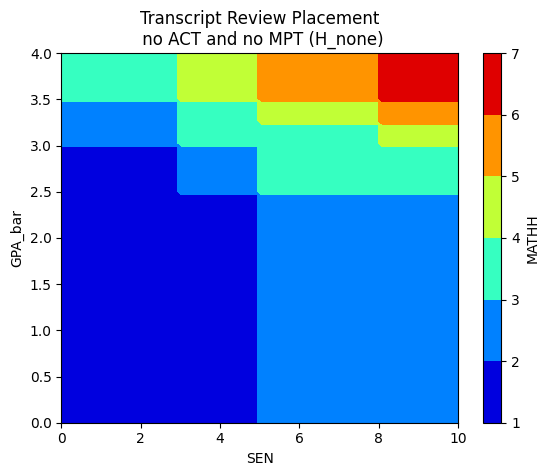

In [ ]:
#@title
gpa_range = np.linspace(0, 4, 100)
sen_range = np.linspace(0, 10, 100)

# Create a meshgrid of inputs
gpa_grid, sen_grid = np.meshgrid(gpa_range, sen_range)

# Evaluate the function for each combination of inputs
result = np.vectorize(H_none)(gpa_grid, gpa_grid, sen_grid)

plt.contourf(sen_grid, gpa_grid, result, levels=range(1, 8), cmap='jet')

plt.colorbar(label='MATHH')
plt.xlabel('SEN')
plt.ylabel('GPA_bar')
plt.title('Transcript Review Placement\n no ACT and no MPT (H_none)')
plt.show()


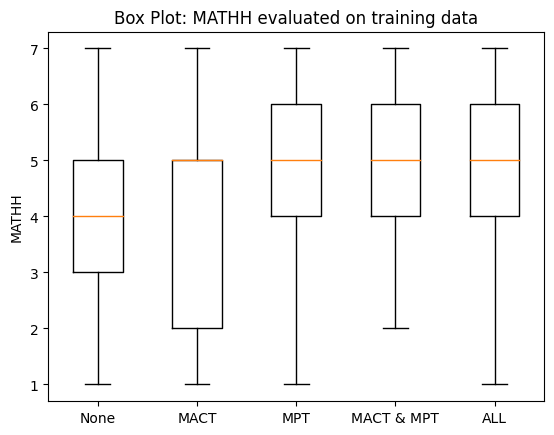

In [ ]:
#@title
#  Select the 'MATHH' column where Type is 'h_none'
None_data =dg.loc[dg['Type'] == 'h_none', 'MATHH']

# Select the 'MATHH-NN' column where Type is 'Type3A'
MPT_data = dg.loc[dg['Type'] == 'h_mpt', 'MATHH']

# Select the 'MATHH-NN' column where Type is 'Type6A'
MACT_data = dg.loc[dg['Type'] == 'h_mact', 'MATHH']

# Select the 'MATHH-NN' column where Type is 'Type7A'
Both_data = dg.loc[dg['Type'] == 'h_both', 'MATHH']

All_data=dg.loc[pd.to_numeric(dg['MATHH'], errors='coerce').notnull(), 'MATHH']

# Create a list of the selected data
data = [None_data, MACT_data, MPT_data, Both_data,All_data]

# Create a box plot using the selected data
plt.boxplot(data, labels=['None', 'MACT','MPT','MACT & MPT', 'ALL'])
# plt.xlabel('Type')
plt.ylabel('MATHH')
plt.title('Box Plot: MATHH evaluated on training data')
plt.show()